<a href="https://colab.research.google.com/github/BrianLahr/Machine-Learning/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Author:**  *Brian Lahr*




**Created on:** *January 25th, 2023.*

**Last edited:** *January 30th, 2023.*

# Library and Data Import

Here, we explain the use of each library specifically in regard to the code developed along this notebook. Please, note that these are not the only uses of these libraries; in fact, they might not even be their central application.

Nevertheless, they will be used here as it follows from their description:

In [ ]:
!pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd               # Manipulate data contained in datasheets as DataFrame objects, or rewrite them into new datasheets.
import numpy as np                # Manipulate a very useful type of data called 'array', using it for numerical operations mainly.
import matplotlib.pyplot as plt   # Generate 2D plots in order to visualize the results obtained by the NN.
import xlsxwriter

from sklearn.neural_network import MLPRegressor       # Create neural network estimators (models) and use them.
from sklearn.model_selection import GridSearchCV      # Tune the hyperparameters of the estimator based on a exhaustive Grid Search.
from sklearn.model_selection import train_test_split  # Separate the input data in training and testing datasets.
from sklearn.preprocessing import StandardScaler      # Standardization of data.

# Metrics that are going to be used along the evaluation and testing of the models, to give useful and comprehensible results.

from sklearn.metrics import mean_absolute_error       
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import tensorflow as tf     # Used for fast numerical computing, and also creating deep learning models/networks
from tensorflow.keras import layers
# from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Input, Concatenate, Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model

import os

In [ ]:
# The data will be imported from my personal drive. This can be easily edited.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original = pd.read_excel('/content/drive/MyDrive/Tudin/IC/Fortulan/R_e_X_tracos.xlsx')
df_v2_original = pd.read_excel('/content/drive/MyDrive/Tudin/IC/Fortulan/R_e_X_tracos_v2.xlsx')
df_v3_original = pd.read_excel('/content/drive/MyDrive/Tudin/IC/Fortulan/R_e_X_tracos_v3.xlsx')

# Data Preparation and Visualization

Here, we note that the given dataset consists of 1200 rows (registers), each consisting of a different set of five features.

This is because the original dataset was composed of 24 measures on 50 different values of frequency.

> Therefore, it was essencialy a 50x24 matrix: 50x24 = 1200.


In [ ]:
df_original

,frequency,R,X,a,c,a_c
0,4.000000e+01,8.476290,-2.977194,0.451948,0.071414,0.45
1,5.378400e+01,8.259911,-2.391099,0.451948,0.071414,0.45
2,7.231800e+01,8.079077,-1.922352,0.451948,0.071414,0.45
3,9.723800e+01,7.927038,-1.552142,0.451948,0.071414,0.45
4,1.307460e+02,7.800076,-1.252480,0.451948,0.071414,0.45
...,...,...,...,...,...,...
1195,2.447486e+07,-4.024560,-5.913289,0.948357,0.086107,0.95
1196,3.290885e+07,-4.872946,-5.100729,0.948357,0.086107,0.95
1197,4.424917e+07,-5.408673,-4.369017,0.948357,0.086107,0.95
1198,5.949734e+07,-5.171310,-3.998801,0.948357,0.086107,0.95


The target set is composed by the columns 'a', 'c' and 'a_c', the input data will be given by the values of 'frequency', 'R' and 'X'.


> It's worth to notice that the three features of the target set are redundant, since 'a_c' is simply the rounded division of 'a' by 'c'.

Because of that, we will try and predict them in five different ways, which will be exploited later.



In [ ]:
df = df_original.drop(columns='a_c')
df_v2 = df_v2_original.drop(columns='a_c')
df_v3 = df_v3_original.drop(columns='a_c')

df

,frequency,R,X,a,c
0,4.000000e+01,8.476290,-2.977194,0.451948,0.071414
1,5.378400e+01,8.259911,-2.391099,0.451948,0.071414
2,7.231800e+01,8.079077,-1.922352,0.451948,0.071414
3,9.723800e+01,7.927038,-1.552142,0.451948,0.071414
4,1.307460e+02,7.800076,-1.252480,0.451948,0.071414
...,...,...,...,...,...
1195,2.447486e+07,-4.024560,-5.913289,0.948357,0.086107
1196,3.290885e+07,-4.872946,-5.100729,0.948357,0.086107
1197,4.424917e+07,-5.408673,-4.369017,0.948357,0.086107
1198,5.949734e+07,-5.171310,-3.998801,0.948357,0.086107


In [ ]:
# Extracting the input and target datasets:

X = df.drop(columns=['a', 'c'])
y = df.drop(columns=['frequency', 'R', 'X'])

X_v2 = df_v2.drop(columns=['a', 'c'])
y_v2 = df_v2.drop(columns=['frequency', 'R', 'X'])

X_v3 = df_v3.drop(columns=['a', 'c'])
y_v3 = df_v3.drop(columns=['frequency', 'R', 'X'])

In [ ]:
# Splitting X and y into training and testing sets (80%/20%):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Note: the random_state was arbitrarily chosen.

X_v2_train, X_v2_test, y_v2_train, y_v2_test = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)
X_v3_train, X_v3_test, y_v3_train, y_v3_test = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)

In [ ]:
# In order to avoid concatenating problems regarding indexes later, we will reset the indexes from those sets:

X_train.reset_index(inplace=True)
X_train.drop(columns='index', inplace=True)

X_test.reset_index(inplace=True)
X_test.drop(columns='index', inplace=True)

y_train.reset_index(inplace=True)
y_train.drop(columns='index', inplace=True)

y_test.reset_index(inplace=True)
y_test.drop(columns='index', inplace=True)

y_test # To test if these lines worked successfully.

,a,c
0,0.948357,0.086107
1,0.950980,0.082140
2,0.649254,0.071889
3,0.650177,0.076906
4,0.550633,0.071698
...,...,...
235,0.549254,0.076634
236,0.950980,0.082140
237,0.851852,0.077248
238,0.948357,0.086107


In [ ]:
X_v2_train.reset_index(inplace=True)
X_v2_train.drop(columns='index', inplace=True)

X_v2_test.reset_index(inplace=True)
X_v2_test.drop(columns='index', inplace=True)

y_v2_train.reset_index(inplace=True)
y_v2_train.drop(columns='index', inplace=True)

y_v2_test.reset_index(inplace=True)
y_v2_test.drop(columns='index', inplace=True)

In [ ]:
X_v3_train.reset_index(inplace=True)
X_v3_train.drop(columns='index', inplace=True)

X_v3_test.reset_index(inplace=True)
X_v3_test.drop(columns='index', inplace=True)

y_v3_train.reset_index(inplace=True)
y_v3_train.drop(columns='index', inplace=True)

y_v3_test.reset_index(inplace=True)
y_v3_test.drop(columns='index', inplace=True)

In [ ]:
X_v3_train.drop(columns='Unnamed: 0', inplace=True)
X_v3_test.drop(columns='Unnamed: 0', inplace=True)

y_v3_train.drop(columns='Unnamed: 0', inplace=True)
y_v3_test.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
# Standardization of data:

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
sc_v2 = StandardScaler()

X_v2_train_scaled= sc.fit_transform(X_v2_train)
X_v2_test_scaled= sc.transform(X_v2_test)

In [ ]:
sc_v3 = StandardScaler()

X_v3_train_scaled= sc.fit_transform(X_v3_train)
X_v3_test_scaled= sc.transform(X_v3_test)

In [ ]:
X_v3_test_scaled[0:3,:]

array([[-0.38218054,  0.54480554,  0.73195734],
       [-0.39209201,  0.78758069,  0.79022247],
       [-0.39230426,  0.64020369, -0.23197693]])

# Auxiliar Custom Functions

These are some custom and simple functions, used with the intent of making the code clearer and easier to read and understand.

In [ ]:
# Takes as input a numpy.nd_array and returns, as output, a pandas DataFrame.
# It's used to create a DataFrame with both colums: 'a' and 'c'.

def to_df(y, columns):
    if len(columns) == 2:
      y_df = pd.DataFrame(y, columns=[columns[0], columns[1]])
    else:
      y_df = pd.DataFrame(y, columns=[columns[0]])
    return y_df

In [ ]:
# Takes as input a DataFrame of two columns and returns only one column ('a').

def separate_a(y_df):
    y_a = y_df.drop(columns='c')
    return y_a

In [ ]:
# Takes as input a DataFrame of two columns and returns only one column ('c').

def separate_c(y_df):
    y_a = y_df.drop(columns='a')
    return y_a

In [ ]:
# Takes a DataFrame and two strings:
# name1 = new name for column 'a'; 
# name2 = new name for column 'c'; - and renames the columns of the given DataFrame.
# This is used in order to concatenate all the results for the final DataFrame.

def change_name_to_a_c(df, name1, name2):
    df.rename(
    columns={"a": name1, "c": name2},
    inplace=True,
)
    return df

In [ ]:
# Takes a DataFrame and one string.
# This is used in order to concatenate all the results for the final DataFrame.

def change_name_to(df, column, new_name):
    df.rename(
    columns={column: new_name},
    inplace=True,
)
    return df

In [ ]:
# Python program to convert a list
# to string using join() function
   
# Function to convert 
def listToString(s):
   
    # initialize an empty string
    str1 = " "
   
    # return string 
    return (str1.join(s))

In [ ]:
# Calculates the deviation between y_true and y_pred (true and NN's predicted values).

def calc_deviation(y_true, y_pred):
    dev = np.divide(np.absolute(np.subtract(y_true, y_pred)), y_true)
    dev_percent = dev * 100

    return dev, dev_percent

**Ideias:** Salvar e gerar gráficos por funções.

# Datasheet v2 - Predicting 'a'

In [ ]:
columns = ['a', 'c']

y_test_df = to_df(y_v2_test, columns)
y_test_a_df = separate_a(y_test_df)
y_test_a = y_test_a_df.to_numpy()

In [ ]:
y_train_a = separate_a(y_train)
y_train_a_df = pd.DataFrame(y_train_a, columns=['a'])

### MLP Regressor 2

##### Building and fitting

In [ ]:
# Building the estimator:

regressor_MLP_2 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.01, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
# Fitting the model to the given data:

model_MLP_2 = regressor_MLP_2.fit(X_train_scaled, y_train)

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

y_pred_MLP_2 = regressor_MLP_2.predict(X_test_scaled)

In [ ]:
mae_percent_MLP_2 = (mean_absolute_percentage_error(y_test, y_pred_MLP_2))*100
print(f'Mean absolute error (%): {mae_percent_MLP_2:.4}%')

Mean absolute error (%): 7.899%


##### Visualizing and saving results

### Model 2 - MAE Training - MAPE: 3.611%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

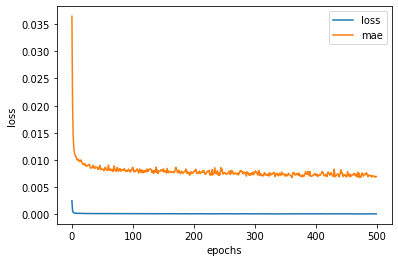

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

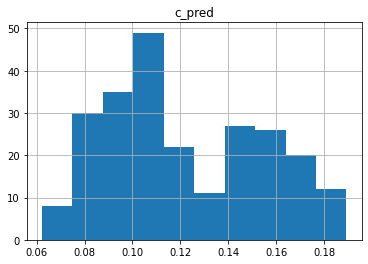

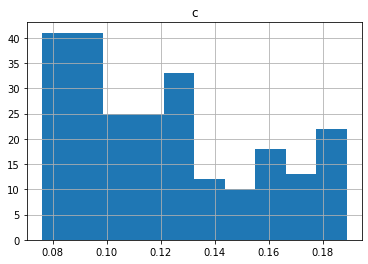

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


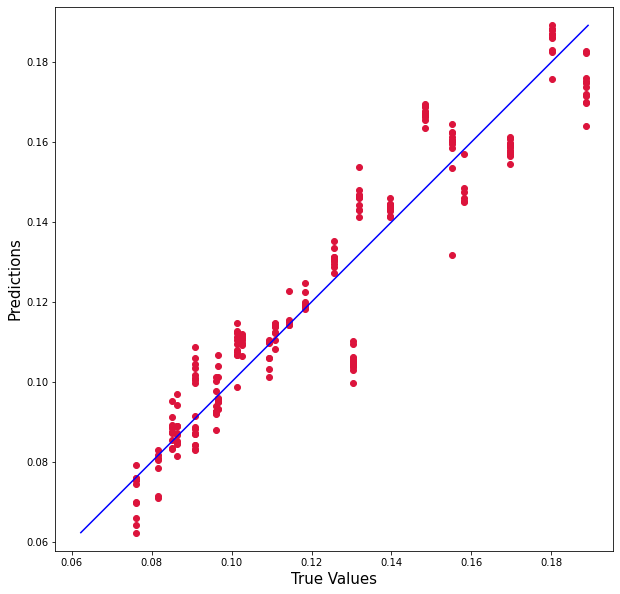

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

### Model 3 - MSE Training - MAPE: 4.52%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

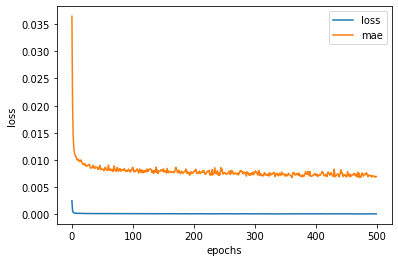

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

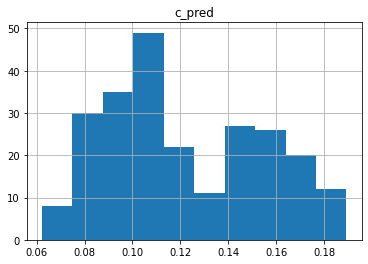

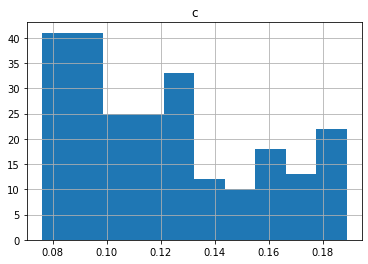

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


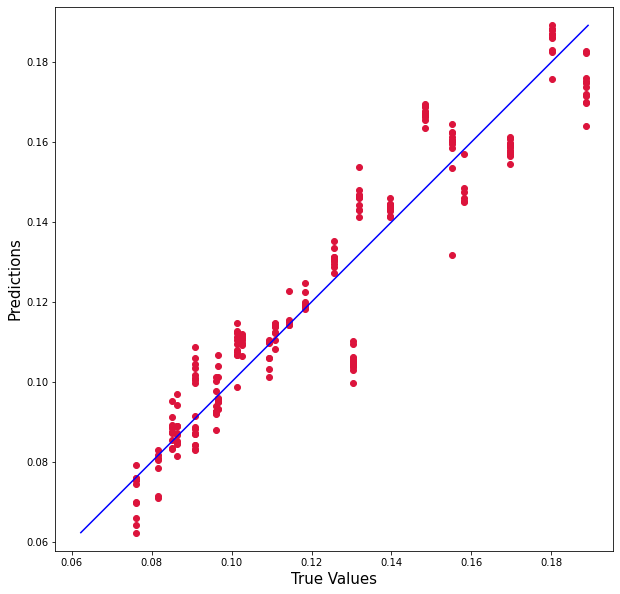

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

# Datasheet v2 - Predicting 'c'

In [ ]:
columns = ['a', 'c']

y_test_df = to_df(y_v2_test, columns)
y_test_c_df = separate_c(y_test_df)
y_test_c = y_test_c_df.to_numpy()

In [ ]:
y_train_c = separate_c(y_v2_train)
y_train_c_df = pd.DataFrame(y_train_c, columns=['c'])

### MLP Regressor 2

##### Building and fitting

In [ ]:
# Building the estimator:

regressor_MLP_2 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.01, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
# Fitting the model to the given data:

model_MLP_2 = regressor_MLP_2.fit(X_train_scaled, y_train)

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

y_pred_MLP_2 = regressor_MLP_2.predict(X_test_scaled)

In [ ]:
mae_percent_MLP_2 = (mean_absolute_percentage_error(y_test, y_pred_MLP_2))*100
print(f'Mean absolute error (%): {mae_percent_MLP_2:.4}%')

Mean absolute error (%): 7.899%


##### Visualizing and saving results

### Model 1 - 2x20, ReLu - MSE Training - MAPE: 6.232%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

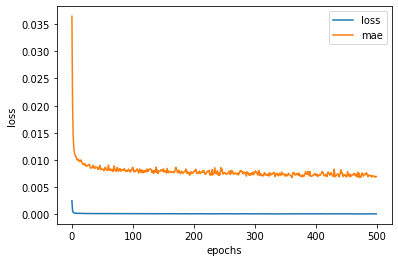

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

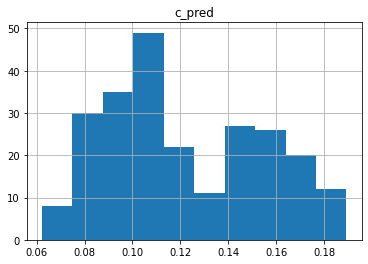

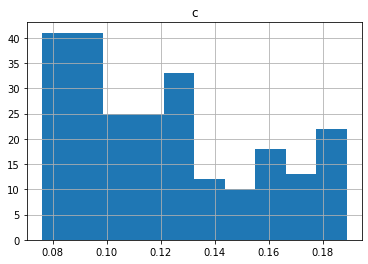

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


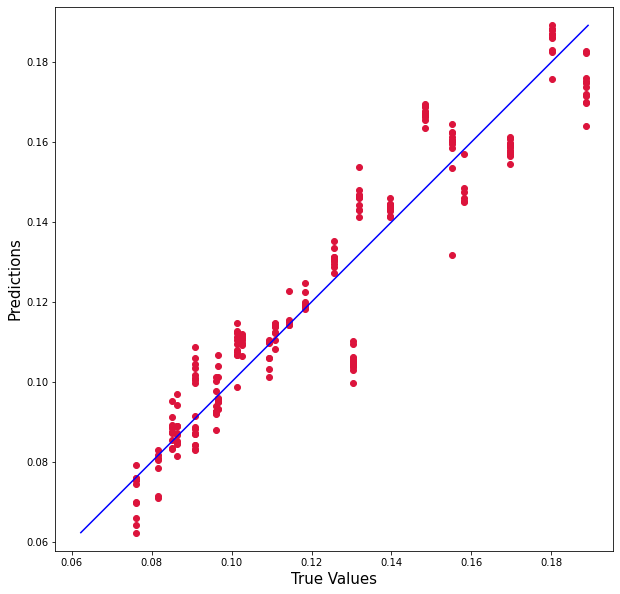

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

### Model 5 - MSE Training (1000 epochs) - MAPE: 4.786%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

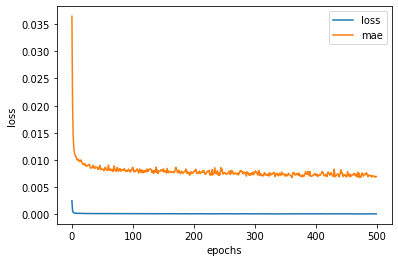

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

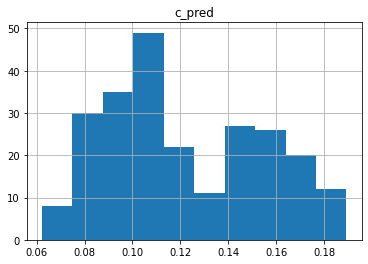

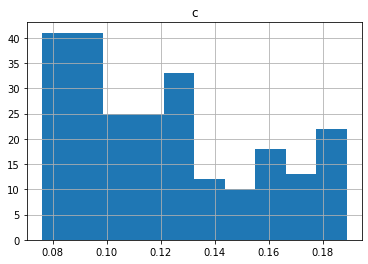

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


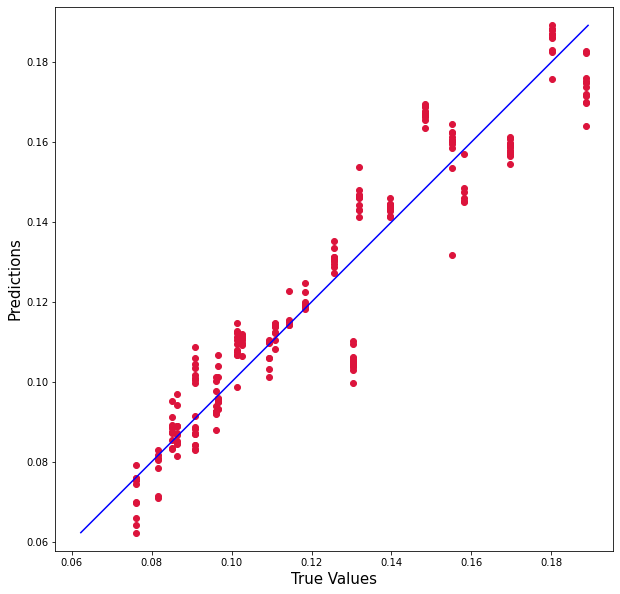

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

### Model 5 - MAE Training (1000 epochs) - MAPE: 5.633%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

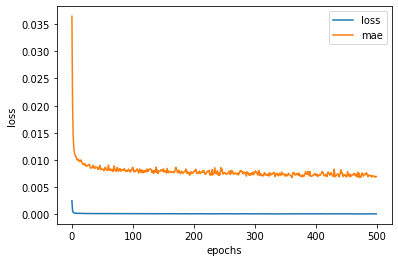

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

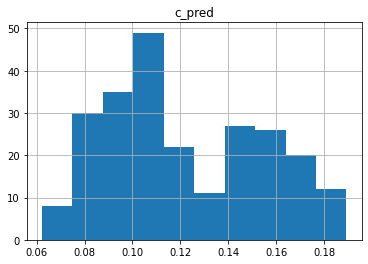

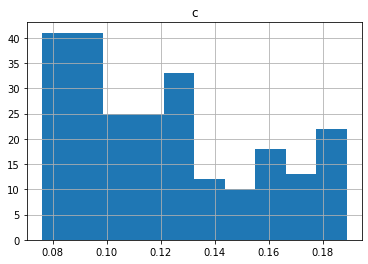

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


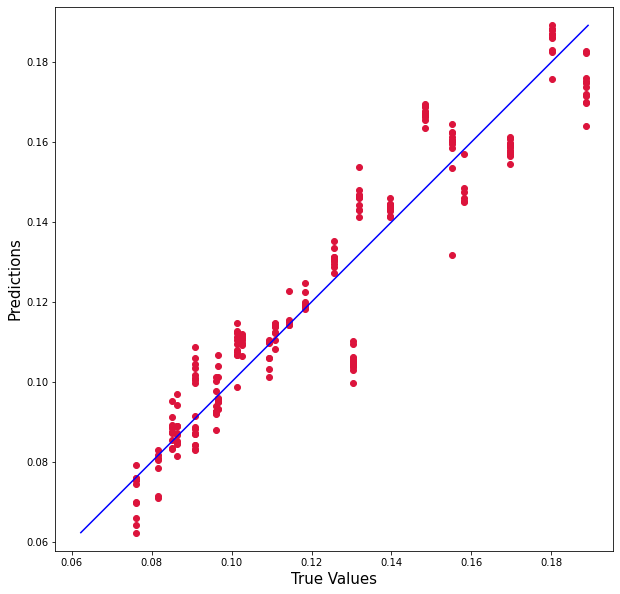

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

### Model 6 - MAE Training (2000 epochs) - MAPE: 4.914%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

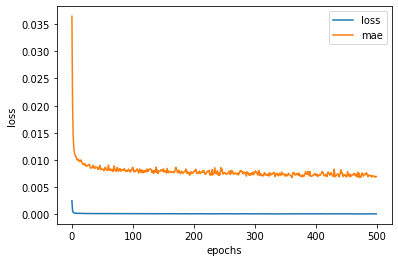

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

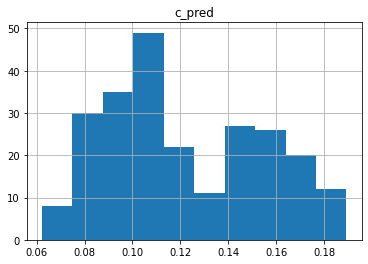

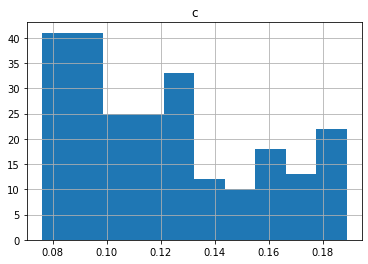

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


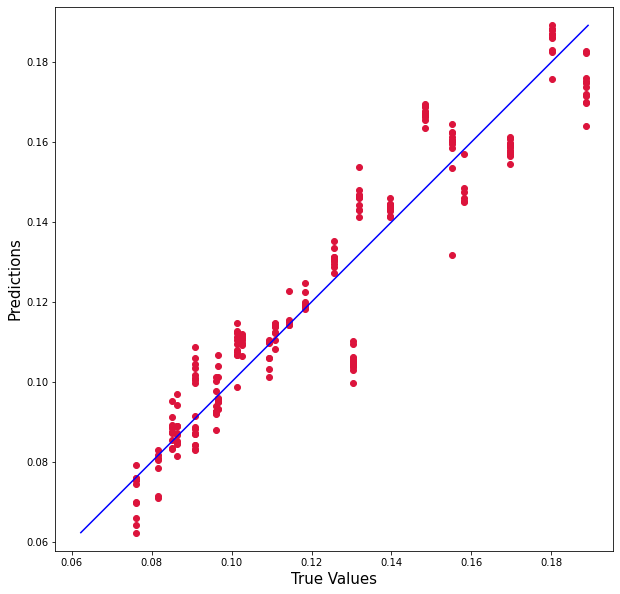

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

### Model 7 - LogCosh Training (2000 epochs) - MAPE: 4.882%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

initializer = 'glorot_normal'

activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')

model_1_c = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),         
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1_c.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1_c = model_1_c.fit(X_train_scaled, y_train_c, epochs=500, verbose=0) 

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

model_1_c_loss, model_1_c_mae = model_1_c.evaluate(X_test_scaled, y_test_c)

8/8 [==============================] - 0s 2ms/step - loss: 1.0551e-04 - mae: 0.0078


In [ ]:
y_pred = model_1_c.predict(X_test_scaled)

mae_percent_1_c = (mean_absolute_percentage_error(y_test_c, y_pred))*100
print(f'Mean absolute error (%): {mae_percent_1_c:.4}%')

rmse_MLP_2 = mean_squared_error(y_test_c, y_pred, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 6.232%
Root mean squared error: 0.01027


##### Visualizing results

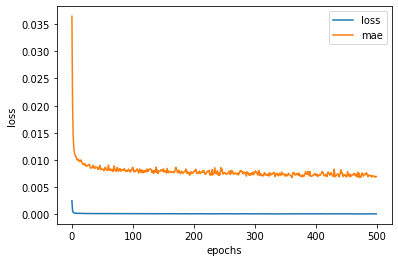

In [ ]:
pd.DataFrame(history_1_c.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f56db4760>]],
      dtype=object)

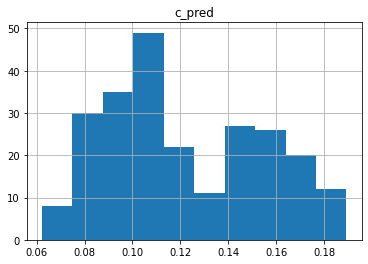

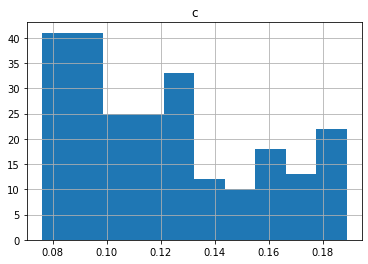

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['c_pred'])
y_pred_df.hist()
y_test_c_df.hist()

In [ ]:
print(y_pred_df.describe())
print(y_test_c_df.describe())

           c_pred
count  240.000000
mean     0.121800
std      0.032789
min      0.062294
25%      0.094749
50%      0.112396
75%      0.147634
max      0.189171
                c
count  240.000000
mean     0.121654
std      0.032835
min      0.076091
25%      0.096146
50%      0.114371
75%      0.148257
max      0.188735


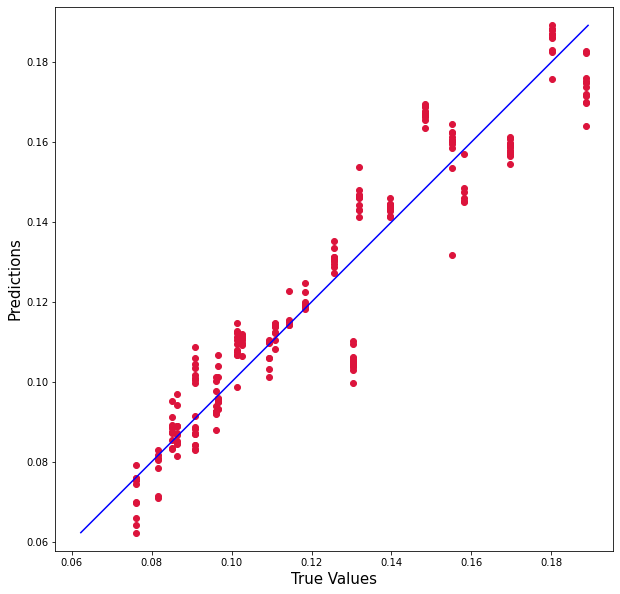

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test_c, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_c))
p2 = min(min(y_pred), min(y_test_c))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_c, dev_percent_1_c = calc_deviation(y_test_c, y_pred)

In [ ]:
dev_percent_1_c.max()

23.552068087118876

##### Saving results

In [ ]:
columns = ['dev_c']
dev_1_c = to_df(dev_1_c, columns)

columns = ['dev_c_%']
dev_percent_1_c = to_df(dev_percent_1_c, columns)

In [ ]:
# Rename column of necessary DataFrame:

y_test_c_df = change_name_to(y_test_c_df, 'c', 'c_true')

In [ ]:
results_1_c = [y_test_c_df, y_pred_df, dev_1_c, dev_percent_1_c]
results_1_c_df = pd.concat(results_1_c,axis=1)

In [ ]:
path = '/content/drive/MyDrive/Tudin/IC/Fortulan/Resultados_Gerados/'
file_name = 'teste_final_notebook_2'
plot_name = 'teste_plot_final_notebook_2'
sheet_name = 'Results'

if file_name != '' and plot_name != '':

  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
  fig.savefig(plot_name + '.png')

  writer = pd.ExcelWriter(path + file_name + '.xlsx', engine = 'xlsxwriter',)
  results_1_c_df.to_excel(writer, sheet_name = sheet_name, float_format = "%.4f")
  
  worksheet = writer.sheets[sheet_name]
  worksheet.insert_image('K7',plot_name + '.png')
  writer.save()

# Datasheet v3 - Predicting 'a'

In [ ]:
columns = ['a', 'c']

y_v3_test_df = to_df(y_v3_test, columns)

In [ ]:
y_v3_test_a_df = separate_a(y_v3_test_df)
y_v3_test_a = y_v3_test_a_df.to_numpy()

In [ ]:
y_v3_train_a = separate_a(y_v3_train)
y_v3_train_a_df = pd.DataFrame(y_v3_train_a, columns=['a'])

### MLP Regressor 2

##### Building and fitting

In [ ]:
# Building the estimator:

regressor_MLP_2 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.01, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
# Fitting the model to the given data:

model_MLP_2 = regressor_MLP_2.fit(X_train_scaled, y_train)

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

y_pred_MLP_2 = regressor_MLP_2.predict(X_test_scaled)

In [ ]:
mae_percent_MLP_2 = (mean_absolute_percentage_error(y_test, y_pred_MLP_2))*100
print(f'Mean absolute error (%): {mae_percent_MLP_2:.4}%')

Mean absolute error (%): 7.899%


##### Visualizing and saving results

### Model 2_v2 - MSE Training (2000 epochs) - MAPE 0.1484%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
initializer = 'glorot_normal'
#tf.keras.initializers.VarianceScaling(scale=1.0, mode="fan_in", distribution="uniform")
activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')
# regularizer = tf.keras.regularizers.L1L2() - Was not effective
# Batch Normalisation - made the results poorer

model_1 = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(15, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(35, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(40, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(15, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(30, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(65, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(20, kernel_initializer = initializer, activation = activation_1),          
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_1.fit(X_v3_train_scaled, y_v3_train_a, epochs=2000, verbose=0) 

##### Testing performance

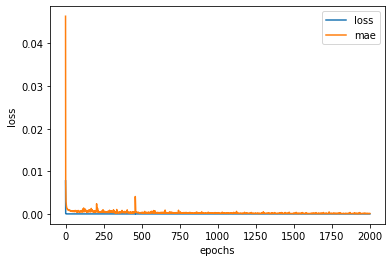

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_1_loss, model_1_mse = model_1.evaluate(X_v3_test_scaled, y_v3_test_a)

8/8 [==============================] - 0s 2ms/step - loss: 1.9386e-08 - mae: 1.1607e-04


In [ ]:
previsoes = model_1.predict(X_v3_test_scaled)
mae_percent_1= (mean_absolute_percentage_error(y_v3_test_a, previsoes))*100
print(f'Mean absolute error (%): {mae_percent_1:.4}%')

rmse_MLP_2 = mean_squared_error(y_v3_test_a, previsoes, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 2ms/step
Mean absolute error (%): 0.1484%
Root mean squared error: 0.0001392


In [ ]:
previsoes_df = pd.DataFrame(previsoes, columns=['a_pred'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e0bb10580>]],
      dtype=object)

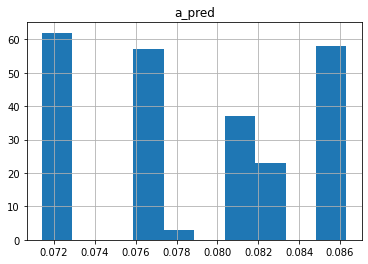

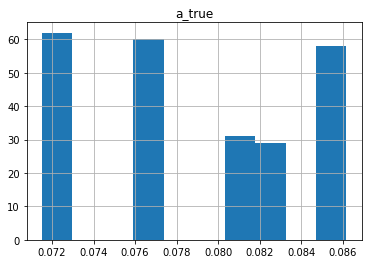

In [ ]:
previsoes_df.hist()
pd.DataFrame(y_v3_test_a, columns=['a_true']).hist()

In [ ]:
print(previsoes_df.describe())
print(pd.DataFrame(y_v3_test_a, columns=['a_true']).describe())

           a_pred
count  240.000000
mean     0.078930
std      0.005191
min      0.071414
25%      0.072458
50%      0.077484
75%      0.082554
max      0.086311
           a_true
count  240.000000
mean     0.078968
std      0.005131
min      0.071517
25%      0.072349
50%      0.077376
75%      0.082203
max      0.086177


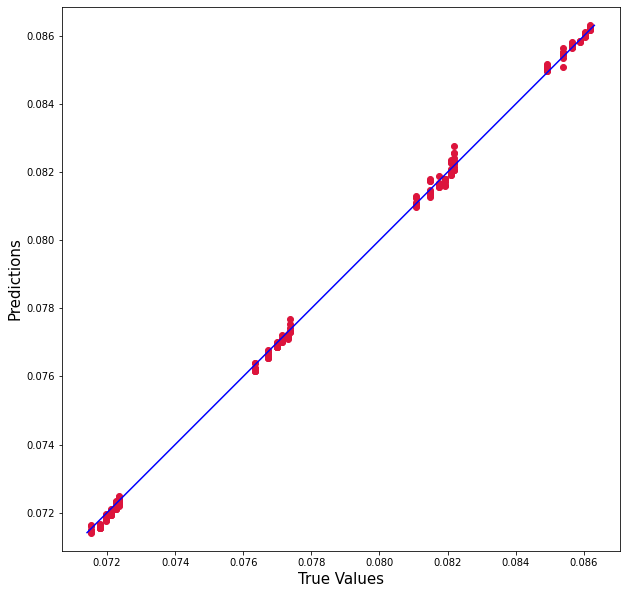

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

plt.figure(figsize=(10,10))
plt.scatter(y_v3_test_a, previsoes, c='crimson')

p1 = max(max(previsoes), max(y_v3_test_a))
p2 = min(min(previsoes), min(y_v3_test_a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_a, dev_percent_1_a = calc_deviation(y_v3_test_a, previsoes)

In [ ]:
dev_percent_1_a.max()

0.6895561808163083

### Model 3_v2 - MSE Training (2000 epochs) - MAPE 0.203%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
initializer = 'glorot_normal'
#tf.keras.initializers.VarianceScaling(scale=1.0, mode="fan_in", distribution="uniform")
activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')
# regularizer = tf.keras.regularizers.L1L2() - Was not effective
# Batch Normalisation - made the results poorer

model_1 = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(45, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(30, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(25, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(50, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(65, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(85, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(55, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(65, kernel_initializer = initializer, activation = activation_2),      
  layers.Dense(75, kernel_initializer = initializer, activation = activation_2),      
  layers.Dense(80, kernel_initializer = initializer, activation = activation_2),                
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_1.fit(X_v3_train_scaled, y_v3_train_a, epochs=2000, verbose=0) 

##### Testing performance

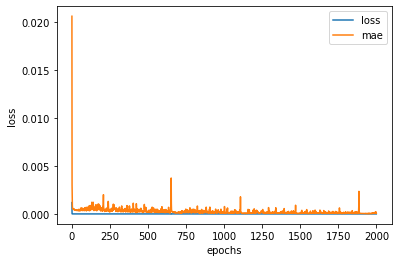

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_1_loss, model_1_mse = model_1.evaluate(X_v3_test_scaled, y_v3_test_a)

8/8 [==============================] - 0s 3ms/step - loss: 3.5249e-08 - mae: 1.5783e-04


In [ ]:
previsoes = model_1.predict(X_v3_test_scaled)
mae_percent_1= (mean_absolute_percentage_error(y_v3_test_a, previsoes))*100
print(f'Mean absolute error (%): {mae_percent_1:.4}%')

rmse_MLP_2 = mean_squared_error(y_v3_test_a, previsoes, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 3ms/step
Mean absolute error (%): 0.203%
Root mean squared error: 0.0001877


In [ ]:
previsoes_df = pd.DataFrame(previsoes, columns=['a_pred'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dff1ae0a0>]],
      dtype=object)

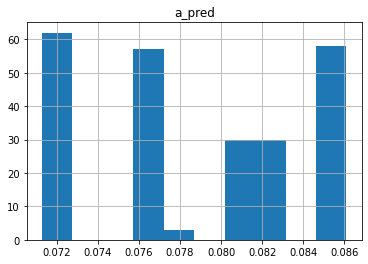

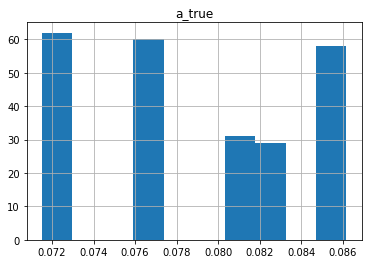

In [ ]:
previsoes_df.hist()
pd.DataFrame(y_v3_test_a, columns=['a_true']).hist()

In [ ]:
print(previsoes_df.describe())
print(pd.DataFrame(y_v3_test_a, columns=['a_true']).describe())

           a_pred
count  240.000000
mean     0.078835
std      0.005161
min      0.071287
25%      0.072220
50%      0.077706
75%      0.082215
max      0.086101
           a_true
count  240.000000
mean     0.078968
std      0.005131
min      0.071517
25%      0.072349
50%      0.077376
75%      0.082203
max      0.086177


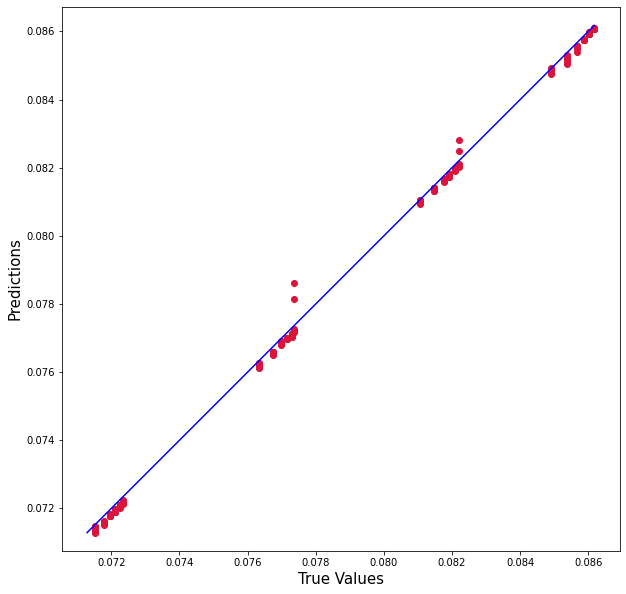

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

plt.figure(figsize=(10,10))
plt.scatter(y_v3_test_a, previsoes, c='crimson')

p1 = max(max(previsoes), max(y_v3_test_a))
p2 = min(min(previsoes), min(y_v3_test_a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_a, dev_percent_1_a = calc_deviation(y_v3_test_a, previsoes)

In [ ]:
dev_percent_1_a.max()

1.600555824520842

# Datasheet v3 - Predicting 'c'

In [ ]:
columns = ['a', 'c']

y_v3_test_df = to_df(y_v3_test, columns)

In [ ]:
y_v3_test_c_df = separate_c(y_v3_test_df)
y_v3_test_c = y_v3_test_c_df.to_numpy()

In [ ]:
y_v3_train_c = separate_c(y_v3_train)
y_v3_train_c_df = pd.DataFrame(y_v3_train_c, columns=['c'])

### MLP Regressor 2

##### Building and fitting

In [ ]:
# Building the estimator:

regressor_MLP_2 = MLPRegressor(hidden_layer_sizes=(100,100,100), activation='relu', solver='lbfgs', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant', 
                               learning_rate_init=0.01, max_iter=2000, random_state=42, 
                               momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08)

In [ ]:
# Fitting the model to the given data:

model_MLP_2 = regressor_MLP_2.fit(X_train_scaled, y_train)

##### Testing performance

In [ ]:
# Making predictions based on the testing set (previously unseen):

y_pred_MLP_2 = regressor_MLP_2.predict(X_test_scaled)

In [ ]:
mae_percent_MLP_2 = (mean_absolute_percentage_error(y_test, y_pred_MLP_2))*100
print(f'Mean absolute error (%): {mae_percent_MLP_2:.4}%')

Mean absolute error (%): 7.899%


##### Visualizing and saving results

### Model 5_v2 - MAE Training (2000 epochs) - MAPE 0.203%

##### Building and fitting

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
initializer = 'glorot_normal'
#tf.keras.initializers.VarianceScaling(scale=1.0, mode="fan_in", distribution="uniform")
activation_1 = tf.keras.activations.get('relu')
activation_2 = tf.keras.activations.get('tanh')
# regularizer = tf.keras.regularizers.L1L2() - Was not effective
# Batch Normalisation - made the results poorer

model_1 = tf.keras.Sequential([
    
  layers.Dense(3, kernel_initializer = initializer),
  layers.Dense(45, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(30, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(25, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(50, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(65, kernel_initializer = initializer, activation = activation_2),
  layers.Dense(85, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(55, kernel_initializer = initializer, activation = activation_1),
  layers.Dense(65, kernel_initializer = initializer, activation = activation_2),      
  layers.Dense(75, kernel_initializer = initializer, activation = activation_2),      
  layers.Dense(80, kernel_initializer = initializer, activation = activation_2),                
  layers.Dense(1, kernel_initializer = initializer)
])

# Compile the model
loss_function = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()
model_1.compile(loss = loss_function, optimizer = optimizer, metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model_1.fit(X_v3_train_scaled, y_v3_train_a, epochs=2000, verbose=0) 

##### Testing performance

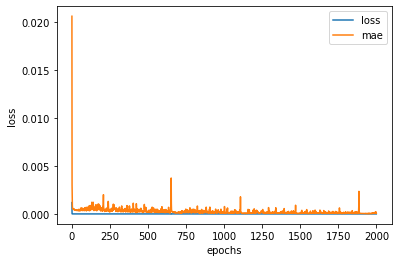

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model_1_loss, model_1_mse = model_1.evaluate(X_v3_test_scaled, y_v3_test_a)

8/8 [==============================] - 0s 3ms/step - loss: 3.5249e-08 - mae: 1.5783e-04


In [ ]:
previsoes = model_1.predict(X_v3_test_scaled)
mae_percent_1= (mean_absolute_percentage_error(y_v3_test_a, previsoes))*100
print(f'Mean absolute error (%): {mae_percent_1:.4}%')

rmse_MLP_2 = mean_squared_error(y_v3_test_a, previsoes, squared=False)
print(f'Root mean squared error: {rmse_MLP_2:.4}')

8/8 [==============================] - 0s 3ms/step
Mean absolute error (%): 0.203%
Root mean squared error: 0.0001877


In [ ]:
previsoes_df = pd.DataFrame(previsoes, columns=['a_pred'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dff1ae0a0>]],
      dtype=object)

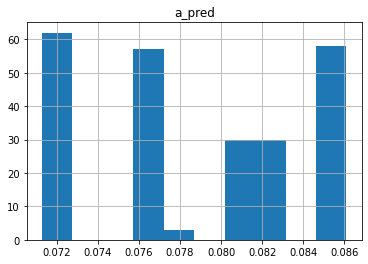

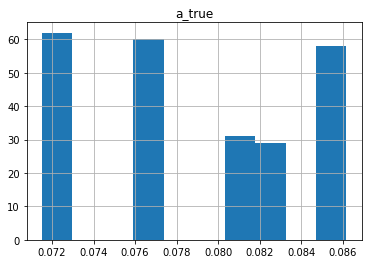

In [ ]:
previsoes_df.hist()
pd.DataFrame(y_v3_test_a, columns=['a_true']).hist()

In [ ]:
print(previsoes_df.describe())
print(pd.DataFrame(y_v3_test_a, columns=['a_true']).describe())

           a_pred
count  240.000000
mean     0.078835
std      0.005161
min      0.071287
25%      0.072220
50%      0.077706
75%      0.082215
max      0.086101
           a_true
count  240.000000
mean     0.078968
std      0.005131
min      0.071517
25%      0.072349
50%      0.077376
75%      0.082203
max      0.086177


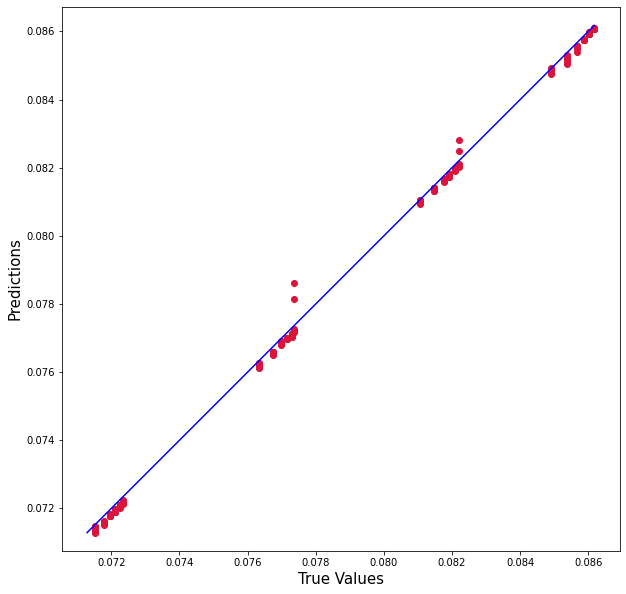

In [ ]:
# Creates a scatter plot of the predicted target values, as well as a fitline from the true values in order to make comparisons.

plt.figure(figsize=(10,10))
plt.scatter(y_v3_test_a, previsoes, c='crimson')

p1 = max(max(previsoes), max(y_v3_test_a))
p2 = min(min(previsoes), min(y_v3_test_a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
dev_1_a, dev_percent_1_a = calc_deviation(y_v3_test_a, previsoes)

In [ ]:
dev_percent_1_a.max()

1.600555824520842